 텍스트 마이닝(Text Mining)

문자 데이터를 활용해서, 필요한 정보를 얻어내는 분석을 텍스트 마이닝(Text Mining)이라고 합니다. 단어의 빈도를 한눈에 파악 할 때 굉장히 유용한 기법입니다.

텍스트 마이닝 기법을 사용하기 위해서, 먼저 패키지를 설치해야 합니다

In [1]:
! pip install jpype1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


패키지 설치를 완료하면, Text Mining을 할 준비가 완료됩니다.

In [3]:
data = open('/content/drive/MyDrive/dj.txt.txt', encoding = 'UTF-8').read()
data

'존경하는 내외 국민 여러분!\n \n다시 한번 여러분의 축하에 감사드립니다. 특히 외국에서 오신 귀빈 여러분께서는 공사간 매우 다망하신데도 불구하고, 이렇게 먼 길 오셔서 축하해 주시니 무어라 감사의 말씀을 드려야 할지 모르겠습니다.\n\n여러분께서는 이 나라에서 50년 만에 여야 간의 평화적 정권교체가 이루어진 데 대해 민주주의의 큰 승리로 생각하고, 축하하고 격려하기 위해 오신 것으로 믿습니다. 또한 여러분께서는 우리가 지금 금융과 외환위기에 처해서 이를 극복하고자 국민과 정부가 하나가 되어 힘쓰고 있는 데 대해, 격려와 성원을 아끼지 않는 심정에서 오신 것으로 믿고 있습니다. 우리는 민주주의와 시장경제를 같이 발전시켜서 여러분 나라에서와 같이 훌륭한 성공을 거둠으로써 여러분의 성원에 보답할 것을 굳게 다짐하고자 합니다.\n\n저는 오랜 군사통치와 권위주의 정치 아래에서 수많은 박해를 받았습니다. 다섯 번에 걸쳐 죽음의 고비를 맞아야 했고, 6년간 감옥살이를 했으며, 10년을 망명과 연금생활 속에 살아야만 했습니다. 그러나 저는 이러한 고통스러운 생활 속에서도 민주주의와 정의는 필승한다는 사실을 한 번도 의심해 본 일이 없습니다. 설사 제 당대에서는 성공하지 못하더라도, 국민의 마음과 역사 속에서 저를 박해한 그들은 반드시 패자가 되고 저는 승자가 될 것이라는 점을 확신해 마지않았습니다. 그런데 저는 살아서 승리의 영광을 차재하게 된 것입니다. 얼마나 감사한 일이겠습니까.\n\n그러나 저를 시험하는 힘든 과정은 결코 끝나지 않았습니다. 대통령에 당선된 그날부터 외환위기의 극복과 IMF와의 힘겨운 협력체제 확립에 몰두하지 않을 수 없었습니다. 우리는 너무도 심각하고 너무도 긴박한 상황 속에 놓여 있습니다. 저는 취임 전인 지난 2개월간 실질적인 대통령 역할을 하지 않으면 안되었습니다. 다행히 국가적인 파국은 일단 모면했습니다. 그러나 위기는 아직도 계속되고 있습니다. 우리는 이 위기를 극복하기 위해 앞으로도 최선을 다하고, IMF와의 협약을 충실히 지켜 나

먼저 텍스트 데이터를 불러왔습니다. 데이터는 김대중 전 대통령의 연설문 입니다. 불필요한 문자가 보이는 것을 알 수 있습니다.

In [4]:
import re
data = re.sub('[^가-힣]',' ', data)
data

'존경하는 내외 국민 여러분    다시 한번 여러분의 축하에 감사드립니다  특히 외국에서 오신 귀빈 여러분께서는 공사간 매우 다망하신데도 불구하고  이렇게 먼 길 오셔서 축하해 주시니 무어라 감사의 말씀을 드려야 할지 모르겠습니다   여러분께서는 이 나라에서   년 만에 여야 간의 평화적 정권교체가 이루어진 데 대해 민주주의의 큰 승리로 생각하고  축하하고 격려하기 위해 오신 것으로 믿습니다  또한 여러분께서는 우리가 지금 금융과 외환위기에 처해서 이를 극복하고자 국민과 정부가 하나가 되어 힘쓰고 있는 데 대해  격려와 성원을 아끼지 않는 심정에서 오신 것으로 믿고 있습니다  우리는 민주주의와 시장경제를 같이 발전시켜서 여러분 나라에서와 같이 훌륭한 성공을 거둠으로써 여러분의 성원에 보답할 것을 굳게 다짐하고자 합니다   저는 오랜 군사통치와 권위주의 정치 아래에서 수많은 박해를 받았습니다  다섯 번에 걸쳐 죽음의 고비를 맞아야 했고   년간 감옥살이를 했으며    년을 망명과 연금생활 속에 살아야만 했습니다  그러나 저는 이러한 고통스러운 생활 속에서도 민주주의와 정의는 필승한다는 사실을 한 번도 의심해 본 일이 없습니다  설사 제 당대에서는 성공하지 못하더라도  국민의 마음과 역사 속에서 저를 박해한 그들은 반드시 패자가 되고 저는 승자가 될 것이라는 점을 확신해 마지않았습니다  그런데 저는 살아서 승리의 영광을 차재하게 된 것입니다  얼마나 감사한 일이겠습니까   그러나 저를 시험하는 힘든 과정은 결코 끝나지 않았습니다  대통령에 당선된 그날부터 외환위기의 극복과    와의 힘겨운 협력체제 확립에 몰두하지 않을 수 없었습니다  우리는 너무도 심각하고 너무도 긴박한 상황 속에 놓여 있습니다  저는 취임 전인 지난  개월간 실질적인 대통령 역할을 하지 않으면 안되었습니다  다행히 국가적인 파국은 일단 모면했습니다  그러나 위기는 아직도 계속되고 있습니다  우리는 이 위기를 극복하기 위해 앞으로도 최선을 다하고     와의 협약을 충실히 지켜 나갈 것입니다  

re 패키지를 import 해서 한글이 아닌 데이터를 제거해 주었습니다.

In [5]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import konlpy
hannanum = konlpy.tag.Hannanum()

nouns = hannanum.nouns(data)
nouns

['존경',
 '내외',
 '국민',
 '여러분',
 '한번',
 '여러분',
 '축하',
 '외국',
 '귀빈',
 '여러분',
 '공사간',
 '다망',
 '불구',
 '길',
 '축하',
 '무어',
 '감사',
 '말씀',
 '여러분',
 '나라',
 '년',
 '만',
 '여',
 '간',
 '평화적',
 '정권교체',
 '데',
 '민주주의',
 '승리',
 '생각',
 '축하',
 '격려',
 '것',
 '여러분',
 '우리',
 '금융',
 '외환위',
 '이',
 '극복',
 '국민',
 '정부',
 '하나',
 '데',
 '격려',
 '성원',
 '심정',
 '것',
 '우리',
 '민주주의',
 '시장경제',
 '발전',
 '여러분',
 '나라',
 '훌륭',
 '성공',
 '여러분',
 '성원',
 '보답',
 '것',
 '다짐',
 '저',
 '군사통치',
 '권위주의',
 '정치',
 '아래',
 '박해',
 '다섯',
 '번',
 '죽음',
 '고비',
 '년',
 '감옥살이',
 '년',
 '망명',
 '연금생활',
 '속',
 '저',
 '고통',
 '생활',
 '속',
 '민주주의',
 '정의',
 '필승',
 '사실',
 '번',
 '의심',
 '일',
 '저',
 '당대',
 '성공',
 '국민',
 '마음',
 '역사',
 '속',
 '저',
 '그',
 '패자',
 '저',
 '승자',
 '것',
 '점',
 '확신',
 '저',
 '승리',
 '영광',
 '차재하',
 '것',
 '감사',
 '일',
 '저',
 '시험',
 '과정',
 '대통령',
 '당선',
 '그날',
 '외환위기',
 '극복',
 '와',
 '협력체제',
 '확립',
 '몰두',
 '수',
 '우리',
 '심각',
 '긴박',
 '상황',
 '속',
 '저',
 '취',
 '전',
 '개월',
 '실질적',
 '대통령',
 '역할',
 '국가적',
 '파국',
 '모면',
 '위기',
 '계속',
 '우리',
 '위',
 '극복',
 '앞',
 

텍스트에서 명사 추출을 위해, konlpy.tag.Hannanum()의 nouns()를 이용했습니다.

위와 같이 명사만 추출된 것을 볼 수 있습니다.

In [7]:
import pandas as pd
word = pd.DataFrame({'word' : nouns})
word

,word
0,존경
1,내외
2,국민
3,여러분
4,한번
...,...
297,국민
298,여러분
299,한번
300,감사


In [8]:
word['count'] = word['word'].str.len()
word

,word,count
0,존경,2
1,내외,2
2,국민,2
3,여러분,3
4,한번,2
...,...,...
297,국민,2
298,여러분,3
299,한번,2
300,감사,2


In [9]:
word = word.query('count >= 2' and 'count < 4')
word = word.sort_values('count', ascending = True)
word

,word,count
150,저,1
109,저,1
108,일,1
106,것,1
102,저,1
...,...,...
134,국가적,3
277,문화적,3
5,여러분,3
147,여러분,3


편리하게 사용하기 위해서 데이터 프레임 형태로 변환 후, 글자 수 2~4개 까지의 단어만 남긴 후 다 날렸습니다. 
query()로 count 2개에서 4개 사이 추출. sort_values()로 오름차순 정렬.

In [10]:
word = word.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False).head(20)
word

,word,n
107,우리,15
96,여러분,10
124,저,10
8,것,10
25,국민,7
161,협력,7
80,세계,6
33,나라,5
29,극복,4
81,속,4


head로 글자빈도 상위 15개만 따로 추출했습니다.

In [22]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

Colab 환경에서 그래프 불러올때, 한글이 깨지는 현상이 나타납니다.
위와 같이 폰트 설치를 해주어야, 한글 깨짐 현상을 해결 할 수 있습니다.
설치 후, 런타임 재시작 했습니다.

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic' 

In [12]:
plt.rcParams.update({'font.family': 'NanumBarunGothic',
                     'figure.dpi' : '120',
                     'figure.figsize':[6.5,6]})

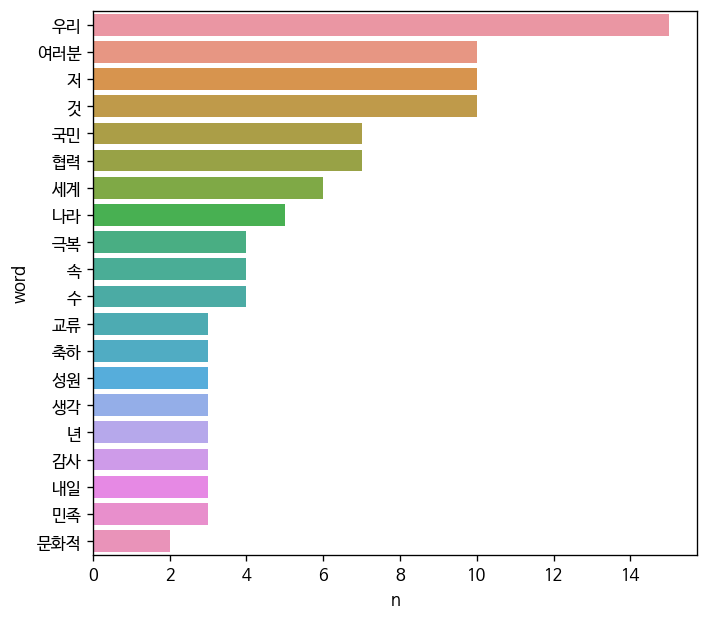

In [13]:
import seaborn as sns
sns.barplot(data = word, y = 'word', x = 'n')

추출해준 단어 빈도수를 그래프로 나타낸 겁니다. 빈도 수 상위 15개의 단어가 잘 나온것을 알 수 있습니다.

이제 설정한 단어로 워드 클라우드를 만들겠습니다.

In [14]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
dic_word = word.set_index('word').to_dict()['n']
dic_word

{'우리': 15,
 '여러분': 10,
 '저': 10,
 '것': 10,
 '국민': 7,
 '협력': 7,
 '세계': 6,
 '나라': 5,
 '극복': 4,
 '속': 4,
 '수': 4,
 '교류': 3,
 '축하': 3,
 '성원': 3,
 '생각': 3,
 '년': 3,
 '감사': 3,
 '내일': 3,
 '민족': 3,
 '문화적': 2}

워드 클라우드를 만들기 위해서, 데이터 프레임을 딕셔너리 형태로 만들었습니다.

In [16]:
font = '/content/drive/MyDrive/Doit_Python-main/Data/DoHyeon-Regular.ttf'

In [19]:
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,
               font_path = font,
               width = 400,
               height = 400,
               background_color = 'white')

background_color를 'white'로 설정 했습니다.
위에 설정값은 원하는 값을 설정해주면 됩니다.

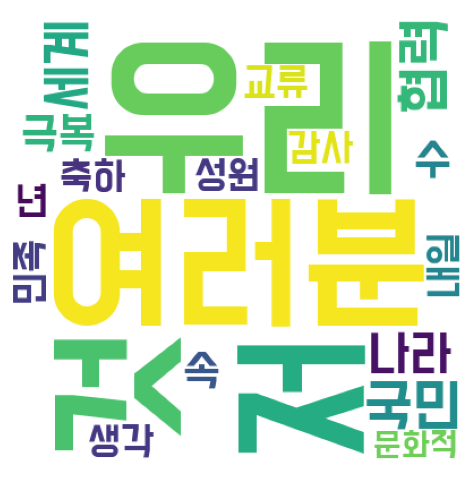

In [20]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(img_wordcloud)

후기: 모듈을 불러오기 위해서, 초기에 다운 받아줘야 하는것이 많았습니다. 어려운 것은 아니었지만, 라이브러리를 불러오고, 원하는 데이터를 추출해오고, 그간 공부했던 것을 복습하는데 도움이 되었습니다.
